In [11]:
#Imputation of data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# Reading the csv file
train=pd.read_csv("Train_UWu5bXk.csv")
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Imputation steps


In [13]:
train.isnull().sum()



Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# Imputation of the values
train["Outlet_Size"]=train["Outlet_Size"].fillna("Medium")
train["Outlet_Establishment_Year"]=train["Outlet_Establishment_Year"].fillna(1985)
mean1=round(train["Item_Weight"].mean(),1)
train["Item_Weight"]=train["Item_Weight"].fillna(mean1)
train


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.900,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


## Irrelevant feature elimination

In [15]:
# drop the target variable, and features having no role in Outlet_Sales
df=train.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
df.head()
df.shape

(8523, 9)

### Columns with categorical values (e.g., High, Medium, Low) need to be converted into numeric value based columns one for each category value.

In [16]:
# converting string values to numeric
print (df.shape)
df=pd.get_dummies(df)
print(df.shape)

(8523, 9)
(8523, 32)


In [17]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [18]:
# (RFE=Recursive feature elimination)

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets

lreg = LinearRegression()
# 4 is no of top features
rfe = RFE(lreg,4)
rfe = rfe.fit(df, train.Item_Outlet_Sales)

features = [c for c in df.head(0)]
pd.DataFrame({'Feature name':features, 
              'Ranking':rfe.ranking_}).sort_values(by='Ranking')


,Feature name,Ranking
31,Outlet_Type_Supermarket Type3,1
24,Outlet_Size_Small,1
23,Outlet_Size_Medium,1
22,Outlet_Size_High,1
29,Outlet_Type_Supermarket Type1,2
30,Outlet_Type_Supermarket Type2,3
28,Outlet_Type_Grocery Store,4
1,Item_Visibility,5
18,Item_Type_Seafood,6
20,Item_Type_Soft Drinks,7


In [19]:
# ## Forward Feature Selection
from sklearn.feature_selection import f_regression
ffs = f_regression(df,train.Item_Outlet_Sales)

# This returns an array containing the F-values of the variables 
# and the p-values corresponding to each F value. 
ffs

# selecting the variables having F-value greater than 10:
variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=50:
       variable.append(df.columns[i])

# top most variables based on the forward feature selection algorithm.
variable

['Item_Visibility',
 'Item_MRP',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1']

In [20]:
# ## Factor Analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df)
#fa.analyze(df, 3, rotation=None)

# We have to select which feature have the 
# highest uniqueness value 
# that feature is the first important variable
np.sort(fa.get_uniquenesses())

array([-0.0089829 , -0.0089829 ,  0.11013061,  0.1628958 ,  0.37695418,
        0.45702803,  0.46488026,  0.46515163,  0.67856535,  0.72733135,
        0.73421108,  0.8719906 ,  0.89970508,  0.93335288,  0.96688738,
        0.97880072,  0.9859097 ,  0.9867665 ,  0.98780125,  0.98979395,
        0.99161666,  0.99334025,  0.99358377,  0.99488201,  0.99599438,
        0.99640573,  0.99900488,  0.99922458,  0.99922878,  0.99933627,
        0.99985134,  0.99993694])

In [21]:
# ## Principle component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4'])

principalDf.head()


,principal component 1,principal component 2,principal component 3,principal component 4
0,108.811059,-1.126399,-3.736744,-0.251716
1,-92.727610,-11.266901,-6.708067,1.279261
2,0.633705,-1.137662,4.643748,-0.259046
3,41.112994,-0.065852,6.265937,1.000948
4,-87.145083,10.765083,-3.863977,0.030285


In [22]:
from numpy import cov

# Examine Covariance of deduced principal components
for i in range(4):
    for j in range(i+1, 4):
        print ('cov({0:d}, {1:d}): {2:.20f}'.format(
                i+1, j+1, cov(principalDf['principal component '+ str(i+1)], 
                              principalDf['principal component '+str(j+1)])[0,1]))


cov(1, 2): 0.00000000000000066702
cov(1, 3): -0.00000000000000213446
cov(1, 4): -0.00000000000000045357
cov(2, 3): -0.00000000000000143409
cov(2, 4): 0.00000000000000001251
cov(3, 4): -0.00000000000000004336


In [23]:
# Component-wise explained variance ratio
cols = ['% Component-wise explained variance', '% Cumulative explained variance']
f = lambda l: ['{0:.2f}'.format(100*x) for x in l]
pd.DataFrame ({cols[0]: f(pca.explained_variance_ratio_), 
              cols[1]: f(np.cumsum(pca.explained_variance_ratio_))},
              columns = cols, index=range(1, 5)).rename_axis('Principal components', axis=1)


Principal components,% Component-wise explained variance,% Cumulative explained variance
1,97.71,97.71
2,1.77,99.48
3,0.45,99.93
4,0.02,99.94


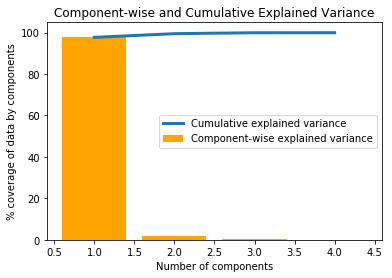

In [24]:
plt.bar(range(1,5), 100*pca.explained_variance_ratio_, color='orange',  label='Component-wise explained variance')
plt.plot(range(1,5), 100*np.cumsum(pca.explained_variance_ratio_), linewidth=3, label='Cumulative explained variance')
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('Number of components')
plt.ylabel('% coverage of data by components')
plt.legend(loc=7)
# We are able to explain around 99% variance in the dataset using 4 components